In [109]:
# import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score





df = pd.read_csv('creditcard.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [111]:
df.sample(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
200979,133676.0,1.930815,-0.134854,-1.838836,0.325826,0.871847,0.105344,0.357272,-0.030949,0.568338,...,0.120063,0.690924,0.081709,-1.001546,0.187635,-0.076901,0.011148,-0.079288,13.00,0
201799,134044.0,-1.354048,0.339861,-0.570930,-0.936190,2.370655,-0.858384,1.927615,-0.338746,-1.135930,...,0.145871,0.042687,-0.299835,0.020198,1.480338,0.756183,-0.160115,0.063884,149.50,0
107154,70306.0,-0.698234,0.467289,1.399359,1.018958,0.054228,0.700647,0.812008,0.304635,-0.482231,...,0.061104,0.076737,-0.022359,-0.342947,0.192415,-0.228345,0.082669,0.096110,116.69,0
88342,62098.0,1.219186,0.540365,-0.481236,0.815109,-0.018043,-1.273673,0.245565,-0.128400,-0.292272,...,-0.100109,-0.316141,-0.058865,0.396872,0.480257,0.342105,-0.040648,0.032657,0.76,0
46673,42882.0,-0.749588,0.136047,1.022075,-0.016437,-0.660497,-0.243733,1.561471,-0.083946,-0.843147,...,0.271166,0.259365,0.376098,0.322890,0.095450,0.438077,-0.094161,0.055506,261.33,0
135573,81313.0,-3.586913,-8.178442,-3.008428,1.323090,-2.995090,-0.494889,3.605481,-0.973495,0.954218,...,1.512877,-1.169268,-2.424322,0.554973,0.012446,-0.819341,-0.446242,0.452273,2539.25,0
148823,90231.0,1.258658,-1.757295,-2.764893,0.178295,-0.077796,-1.284682,1.187028,-0.884802,-0.136107,...,0.087963,0.019077,-0.451518,1.154820,0.288257,0.870266,-0.238245,0.002173,514.99,0
220078,142011.0,-2.230104,1.596513,-1.738848,-1.547597,1.639440,-0.783445,2.244871,-1.447934,1.161718,...,0.065516,0.825189,-0.380172,0.177547,-0.242692,-0.104491,-1.408666,0.196704,78.89,0
191007,129070.0,-1.936867,1.799168,-2.091463,0.649028,1.742982,1.190368,0.382593,1.006636,-0.236577,...,0.070754,0.457964,-0.336342,-1.098970,-0.094922,-0.345591,-0.085513,0.011869,15.25,0
214690,139780.0,-0.850886,0.415157,0.747805,-0.563399,-0.156458,-0.845985,0.317873,0.433587,0.262805,...,-0.213049,-0.878899,0.346935,-0.021790,-1.043625,-0.359251,0.028955,0.102582,50.00,0


In [112]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# EDA

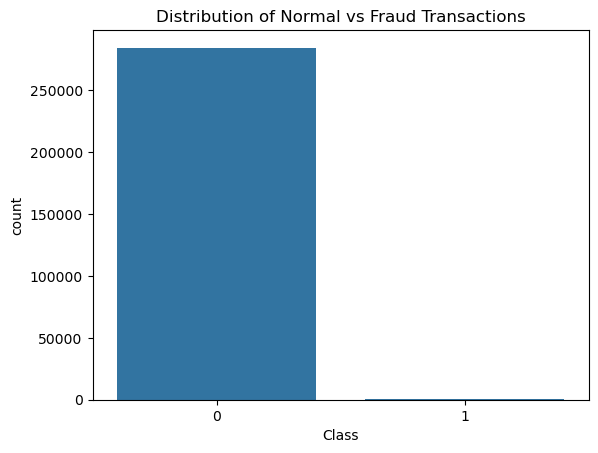

Number of normal transactions: 284315
Number of fraud transactions: 492


In [113]:
# Visualize the distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Distribution of Normal vs Fraud Transactions')
plt.show()

print(f"Number of normal transactions: {len(df[df['Class'] == 0])}")
print(f"Number of fraud transactions: {len(df[df['Class'] == 1])}")

In [114]:
# top 5 features correlated with the fraud
features = [f'V{i}' for i in range(1,28)]
corr_with_target = df[features].corrwith(df['Class']).sort_values(key=abs, ascending=False)
print(corr_with_target)

top_features = corr_with_target.head(5).index.tolist()
print(f"Top 5 features that possibly correlated with fraud: {top_features}")

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
V1    -0.101347
V9    -0.097733
V5    -0.094974
V2     0.091289
V6    -0.043643
V21    0.040413
V19    0.034783
V20    0.020090
V8     0.019875
V27    0.017580
V24   -0.007221
V13   -0.004570
V26    0.004455
V15   -0.004223
V25    0.003308
V23   -0.002685
V22    0.000805
dtype: float64
Top 5 features that possibly correlated with fraud: ['V17', 'V14', 'V12', 'V10', 'V16']


In [115]:
#making sure that the this is the top features

all_features = features + ['Amount', 'Time'] 
X = df[all_features]                           
y = df['Class']

m = RandomForestClassifier()
m.fit(X, y)

RandomForestClassifier()

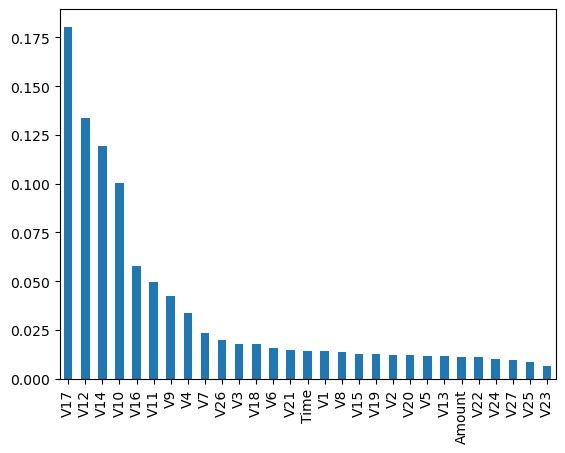

In [116]:
importances = pd.Series(m.feature_importances_, index=all_features)
importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [117]:
#training
imp_features = top_features + ['Amount', 'Time']
X = df[imp_features]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = RandomForestClassifier(class_weight='balanced' , random_state=42 , n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [118]:
# model evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9996488887328394
Confusion Matrix:
 [[56863     1]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.81      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# threshold tuning
y_prob = model.predict_proba(X_test)[:,1]
thresholds = np.arange(0.1, 1.0, 0.05)
for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold={t:.2f} | Precision={precision:.2f} | Recall={recall:.2f} | F1={f1:.2f}")



Threshold=0.10 | Precision=0.83 | Recall=0.87 | F1=0.85
Threshold=0.15 | Precision=0.88 | Recall=0.86 | F1=0.87
Threshold=0.20 | Precision=0.90 | Recall=0.86 | F1=0.88
Threshold=0.25 | Precision=0.92 | Recall=0.84 | F1=0.88
Threshold=0.30 | Precision=0.93 | Recall=0.83 | F1=0.88
Threshold=0.35 | Precision=0.94 | Recall=0.81 | F1=0.87
Threshold=0.40 | Precision=0.96 | Recall=0.81 | F1=0.88
Threshold=0.45 | Precision=0.98 | Recall=0.81 | F1=0.88
Threshold=0.50 | Precision=0.99 | Recall=0.81 | F1=0.89
Threshold=0.55 | Precision=0.99 | Recall=0.81 | F1=0.89
Threshold=0.60 | Precision=0.99 | Recall=0.77 | F1=0.86
Threshold=0.65 | Precision=0.99 | Recall=0.76 | F1=0.86
Threshold=0.70 | Precision=0.99 | Recall=0.74 | F1=0.85
Threshold=0.75 | Precision=0.99 | Recall=0.71 | F1=0.83
Threshold=0.80 | Precision=0.98 | Recall=0.66 | F1=0.79
Threshold=0.85 | Precision=0.98 | Recall=0.57 | F1=0.72
Threshold=0.90 | Precision=1.00 | Recall=0.46 | F1=0.63
Threshold=0.95 | Precision=1.00 | Recall=0.32 | 

In [133]:
best_threshold = 0.20 
y_pred_new = (y_prob >= best_threshold).astype(int)


cm_new = confusion_matrix(y_test, y_pred_new)
report_new = classification_report(y_test, y_pred_new)

print("Confusion Matrix:\n", cm_new)
print(report_new)

Confusion Matrix:
 [[56854    10]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.86      0.88        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

